In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nsfg = pd.read_hdf('data/nsfg.hdf5')

In [3]:
nsfg.shape

(9358, 10)

In [4]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [6]:
ounces = nsfg[["birthwgt_oz1"]]
ounces.head()

,birthwgt_oz1
0,4.0
1,12.0
2,4.0
3,NaN
4,13.0


# Clean and Validate

In [7]:
nsfg = pd.read_hdf('data/nsfg.hdf5')

In [8]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [9]:
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

### Clean a variable

In [10]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [11]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [12]:
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

In [13]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

### Compute a variable

In [14]:
pd.set_option('display.max_columns', 100)
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [15]:
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [16]:
preg_length = (agepreg-agecon)
preg_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

In [17]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

# Filter and visualize

### Make a histogram

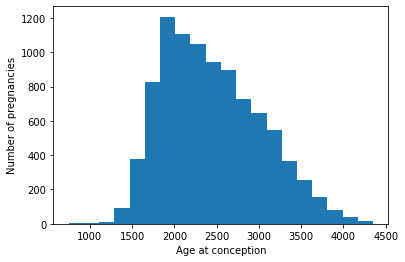

In [27]:
plt.hist(x=nsfg['agecon'], bins=20)

plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

plt.show()

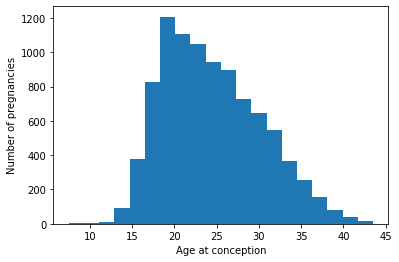

In [28]:
plt.hist(x=agecon, bins=20)

plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

plt.show()

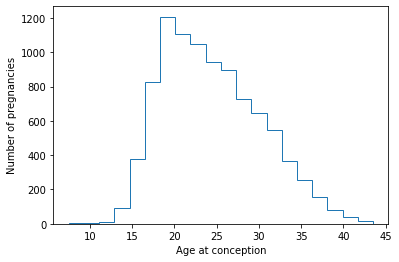

In [29]:
plt.hist(agecon, bins=20, histtype='step')

plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

plt.show()

### Compute birth weight

In [34]:
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

birth_weight = pounds + ounces/16

In [39]:
full_term = nsfg['prglngth'] >= 37
full_term.head()

0     True
1    False
2    False
3    False
4     True
Name: prglngth, dtype: bool

In [42]:
full_term_weight = birth_weight[full_term]

In [43]:
full_term_weight.mean()

7.372323879231473

### Filter

In [44]:
full_term = nsfg['prglngth'] >= 37

single = nsfg['nbrnaliv'] == 1t

single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
